\newpage

## Question 1




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [2]:
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
df = pd.read_csv('kidney_disease.csv')
df = df.drop(['id'], axis = 1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
print(df.shape)
print(df.dtypes)

(400, 25)
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


#Comment

This Chronic Kidney Disease data set has 400 observations and 25 different variable columns. The dataset has a mix of float64 variables and object variables along with one int64 variable. The target varaible is the final variable titled 'ckd' which represent 'chronic kidney disease'. This variable has two entries: 'chronic kidney disease (ckd) or not chornic kidney diseas (notckd)'. In, in this project we will be attempting to predict people with chronic kidney disease using a subset of variables that we have been given in the dataframe.

## Question 2


In [7]:
#convert select columns to categorical
columns_to_convert = ['al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']

for col in columns_to_convert:
    df[col] = pd.Categorical(df[col])

In [8]:
print(df.dtypes)

age                float64
bp                 float64
sg                 float64
al                category
su                category
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                float64
wc                 float64
rc                 float64
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object


In [9]:
#now we scale the non categorical variables
num_col = df.select_dtypes(include=['float64','int64']).columns
print(num_col)
scaler=StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])


Index(['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc',
       'rc'],
      dtype='object')


In [10]:
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-0.203139,0.258373,0.454071,1.0,0.0,NaN,normal,notpresent,notpresent,-0.341498,...,0.569881,-0.206202,0.481295,yes,yes,no,good,no,no,ckd
1,-2.594124,-1.936857,0.454071,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,-0.098536,-0.818559,NaN,no,no,no,good,no,no,ckd
2,0.613295,0.258373,-1.297699,2.0,3.0,normal,normal,notpresent,notpresent,3.473064,...,-0.878356,-0.308261,NaN,no,yes,no,poor,no,yes,ckd
3,-0.203139,-0.473370,-2.173584,4.0,0.0,normal,abnormal,present,notpresent,-0.392022,...,-0.766953,-0.580420,-0.788961,yes,no,no,poor,yes,yes,ckd
4,-0.028189,0.258373,-1.297699,2.0,0.0,normal,normal,notpresent,notpresent,-0.530963,...,-0.432744,-0.376301,-0.104977,no,no,no,good,no,no,ckd


Comment: We converted the nominal variables to categorical variables and also scaled the numerical variables to have a mean of 0 and standard deviation 1. 

## Question 3 

In [11]:
for col in columns_to_convert:
    print(df[col].value_counts(normalize = True, dropna = True))

al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64
rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no       0.648241
yes      0.336683
\tno     0.007538
\tyes    0.005025
 yes     0.002513
Name: proportion, dtype: float64
cad
no      0.909548
yes     0.085427
\tno    0.005025
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype: float64
pe
no     0.809524
yes    0.190476
Name: proportion, dtype

In [12]:
df.describe()

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,3.910000e+02,3.880000e+02,3.530000e+02,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02
mean,9.994847e-17,-2.380684e-16,2.415443e-15,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01
50%,2.050779e-01,2.583733e-01,4.540705e-01,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02
75%,7.590867e-01,2.583733e-01,4.540705e-01,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01
max,2.246163e+00,7.575807e+00,1.329955e+00,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00


In [13]:
df.shape

(400, 25)

In [14]:
df.dtypes

age                float64
bp                 float64
sg                 float64
al                category
su                category
rbc               category
pc                category
pcc               category
ba                category
bgr                float64
bu                 float64
sc                 float64
sod                float64
pot                float64
hemo               float64
pcv                float64
wc                 float64
rc                 float64
htn               category
dm                category
cad               category
appet             category
pe                category
ane               category
classification    category
dtype: object

In [15]:
df['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

Comment: The dataset has 400 observation counts and 25 variables. There are 12 numerical (float64) variables and 13 categorical variables. Each numerical variable has a normal distribution with mean 0 and standard deviation 1. 250 out of 400 patients have 'chronic kidney disease' while 150 out of 400 patients don't have 'chronic kidney disease.The features or variables in this data frame include age, blood pressure, specific gravity, albumin, sugar, red blood cells, pus cell, pus cell clumps, bacteria, blood glucose random, blood urea, serum creatinine, sodium, potassium, hemoglobin, packed cell volume, white blood cell count, red blood cell count, hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, and anemia.

## Question 4

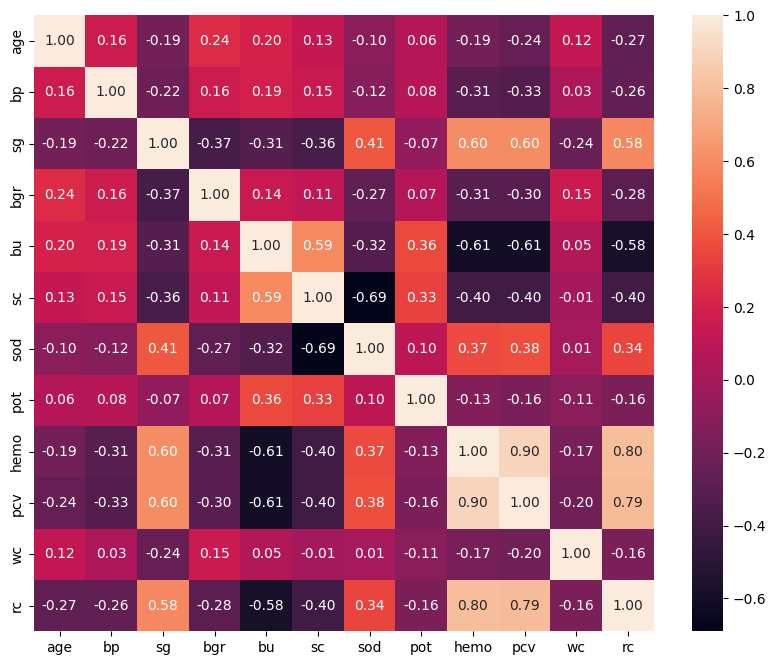

In [16]:
#lets view correlation between only numerical variables using a heat map 
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification'], axis = 1).corr(), annot=True, fmt=".2f")
plt.show()


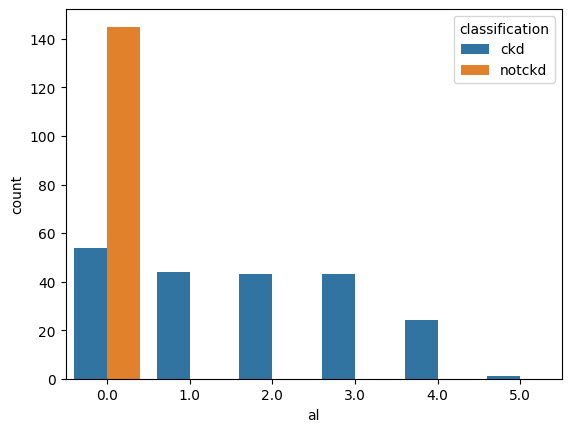

In [17]:
sns.countplot(x='al', hue='classification', data=df)
plt.show()

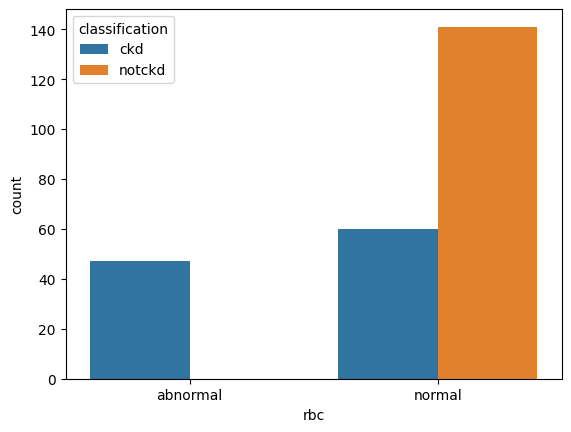

In [18]:
sns.countplot(x='rbc', hue='classification', data=df)
plt.show()

Comment: From the correlation heatmap, we see that 'pcv' (packed cell volume) and 'hemo' (hemoglobin content) are highly correlated. Thus, if one of these variables is signficant in predicting chronic kideny disease (ckd) then it is likely that the other is also signficant as well. From our barplots, we see people with 0 'al' (albumin content) do not have ckd ('cohronic kidney disease') but people with albumin content in a category other than 0 do. This might imply the the 'al' variable is significant in predicitng patients with 'ckd'. Finally, from the other barplot, we see that there are patients with 'ckd' with both abnormal and normal rbc (red blood cell) content. However, the people without 'ckd' all had normal red blood cell content. This could imply that 'rbc' could be significant in predicting ckd but furhter analysis is required. 

## Question 5

In [19]:
print(df.isnull().sum())

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [20]:
df = df.dropna()
df.shape

(158, 25)

Comment: We decided to drop any observations that had a missing value to make the classification technqiues simpler in the sense that we will not have to deal with missing values when implementing algorithms later. 

## Question 6 

In [21]:
df.describe()

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,-0.111973,-0.176968,0.431896,-0.210871,-0.096156,-0.154151,0.126957,0.002968,0.399156,0.337910,0.023755,0.180120
std,0.904623,0.817751,0.963292,0.820255,0.939701,0.536766,0.720683,1.090181,0.990993,1.014341,1.063759,0.996041
min,-2.652441,-1.936857,-2.173584,-0.985679,-0.940302,-0.466102,-2.552778,-0.667102,-3.241109,-3.329218,-1.566995,-2.547777
25%,-0.713410,-1.205114,0.454071,-0.644642,-0.623073,-0.413779,-0.243334,-0.290783,0.025293,-0.154237,-0.639955,-0.202689
50%,-0.057347,0.258373,0.454071,-0.410969,-0.355410,-0.344015,0.141573,-0.039904,0.592616,0.569881,-0.206202,0.237015
75%,0.496661,0.258373,1.329955,-0.205715,-0.152185,-0.256810,0.622708,0.085536,1.116959,1.015493,0.465690,0.872143
max,1.837946,2.453604,1.329955,4.319341,4.987923,2.115162,1.200069,13.288071,1.813219,1.683910,6.121486,3.217231


Comment:

Using df.describe() we can see that there are definitley outliers in certain variables since some variables have 'max' values that are 1.25 times greater that the 75% quartlie. However, because our data set has 12 caetgorical variables (out of 24 excluding the target variable) it would not make sense drop a whole row of observations based on an outlier in one variable. The categorical variables don't have outliers because the max value is the just another category. Thus, we choose not to drop any outliers for this project.

## Question 7 

lets explore the subgroup of all the numerical variables

In [22]:
x_SP = df[['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']]
y_SP = df['classification']
y_SP = y_SP.astype('category').cat.codes

In [23]:
x_SP_train, x_SP_test, y_SP_train, y_SP_test = train_test_split(
    x_SP,
    y_SP, 
    test_size=0.5, 
    random_state=0
    )

In [24]:
k_range = range(1, 15)
scores_r = [] 

for k in k_range:
    knn_r = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn_r.fit(x_SP_train, y_SP_train)
    y_r_pred = knn_r.predict(x_SP_test)
    scores_r.append(round(np.sqrt(metrics.mean_squared_error(y_SP_test, y_r_pred)), 2))

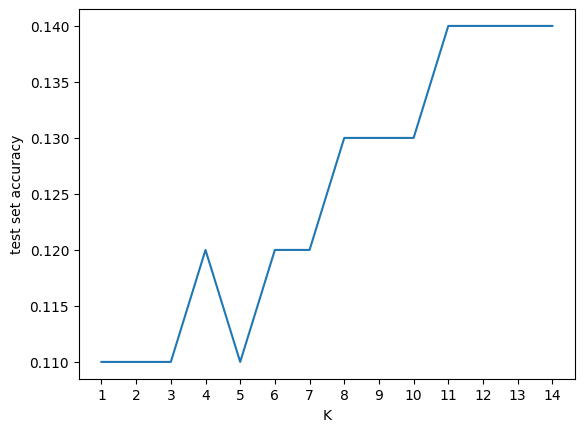

In [25]:
plt.plot(k_range, scores_r)
plt.xlabel('K')
plt.ylabel('test set accuracy')
plt.xticks(range(1,15))
plt.show()

Comment: We see that we get low test accuracies and the most optimal k is 14. This is problematic because we only have two classes for (ckd and notckd). This means that we must look at the categorical variables for further analysis and a more accurate prediction. 

## Question 8 

In [26]:
X = df.drop(columns=['classification'])  # Replace 'target_column' with the name of your target variable
y = df['classification']
y = y.astype('category').cat.codes
cat = ['al', 'su' ,'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

for col in cat:
    X[col] = pd.Categorical(X[col]).codes


# Set the random seed for reproducibility
random_seed = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify = y)

## Question 9 

Comment: Considering our dataframe has an equal mixture of numerical and categorical variables, We are going to use Decision Tree and logistic regression techniques for this project. Other techniques seem to require only numerical variables which would not be appropriate for this data set. 

## Question 10

Logistic regression is a classification model, where the target variable  is categorical and has only two possible outcomes, typically labeled as 0 and 1 (or in this case ckd or notckd). The logistic regression model uses covariates to predicts the probability that a given observation belongs to a particular category based on one or more predictor variables (or independent variables).

A decision tree is classification that is a a tree-like structure where internal nodes represent features, branches represent decision rules, and leaf nodes represent outcomes. It use various criteria to split the data at each internal node and spliting should maximize the homogeneity  of the target variable within each node.

## Question 11 and 12

Note: To enhance the performance of the decision tree, we will decide to prune the tree (i.e calculate the most optimal number of nodes and then use that for our decision tree)

In [27]:
y[:4]

3     0
9     0
11    0
14    0
dtype: int8

In [28]:
model = sm.Logit(y_train, X_train).fit()

         Current function value: 0.000000
         Iterations: 35


c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                           23
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        21:19:22   Log-Likelihood:            -8.8060e-09
converged:                      False   LL-Null:                       -64.455
Covariance Type:            nonrobust   LLR p-value:                 1.012e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -2.4304   3.41e+05  -7.13e-06      1.000   -6.68e+05    6.68e+05
bp             0.2227   3.74e+05   5.96e-07      1.000   -7.33e+05    7.33e+05
sg             5.4044   9.87e+05   5.47e-06      1.000   -1.93e+06    1.93e+06
al           -10.7318   8.46e+06  -1.27e-06      1.000   -1.66e+07    1.66e+07
su             0.0702   7.77e+06   9.03e-09      1.000   -1.52e+07    1.52e+07
rbc           16.3612   1.74e+07   9.42e-07      1.000    -3.4e+07     3.4e+07
pc            17.5684   4.54e+07   3.87e-07      1.000    -8.9e+07     8.9e+07
pcc            2.9733   4.96e+07   5.99e-08      1.000   -9.73e+07    9.73e+07
ba             6.8591   2.35e+07   2.91e-07      1.000   -4.61e+07    4.61e+07
bgr            4.3407   1.49e+06   2.91e-06      1.000   -2.92e+06    2.92e+06
bu            10.0970   1.75e+06   5.75e-06      1.000   -3.44e+06    3.44e+06
sc           -12.6277   4.33e+06  -2.92e-06      1.000   -8.48e+06    8.48e+06
sod            3.3881   7.04e+05   4.81e-06      1.000   -1.38e+06    1.38e+06
pot            0.9606   8.02e+05    1.2e-06      1.000   -1.57e+06    1.57e+06
hemo           4.4768   5.33e+05    8.4e-06      1.000   -1.04e+06    1.04e+06
pcv            1.6459   4.92e+05   3.35e-06      1.000   -9.64e+05    9.64e+05
wc            -2.5923   5.64e+05  -4.59e-06      1.000   -1.11e+06    1.11e+06
rc             0.8854   5.06e+05   1.75e-06      1.000   -9.91e+05    9.91e+05
htn           -9.5349    3.4e+07  -2.81e-07      1.000   -6.66e+07    6.66e+07
dm            -5.1430    2.2e+07  -2.34e-07      1.000   -4.31e+07    4.31e+07
cad            3.7101   8.57e+07   4.33e-08      1.000   -1.68e+08    1.68e+08
appet         -8.7439   2.99e+07  -2.92e-07      1.000   -5.86e+07    5.86e+07
pe             2.3549   3.33e+07   7.07e-08      1.000   -6.53e+07    6.53e+07
ane            5.3480   3.35e+07    1.6e-07      1.000   -6.57e+07    6.57e+07
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [30]:
def_log = LogisticRegression()

In [31]:
def_log.fit(X_train, y_train)

LogisticRegression()

In [32]:
pred_prob = def_log.predict_proba(X_test)
pred_prob
hf = pd.DataFrame(
    data = {'prob0': pred_prob[:,1], 'y_test': y_test}
    )
hf.head()

,prob0,y_test
248,0.071801,0
84,0.002258,0
383,0.992023,1
263,0.988554,1
48,0.091381,0


In [33]:
hf['y_test_pred'] = hf.prob0.map(lambda x: 1 if x>0.5 else 0)
cm = confusion_matrix(hf.y_test, hf.y_test_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[13  0]
 [ 0 35]]


In [34]:
print(classification_report(hf.y_test, hf.y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [35]:
##decision tree

In [36]:
cs_dt = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
) 

In [37]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.5, 0.75, 'al <= 0.5\ngini = 0.397\nsamples = 110\nvalue = [30.0, 80.0]\nclass = notckd'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 80\nvalue = [0, 80]\nclass = notckd'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = ckd')]

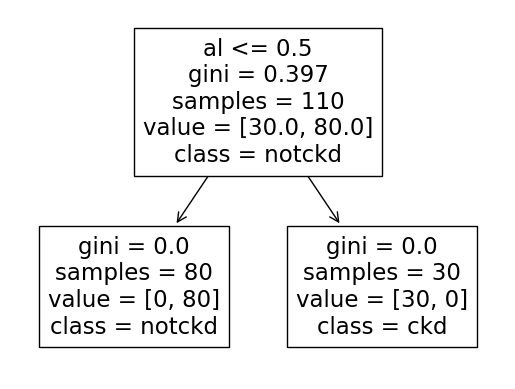

In [38]:
plot_tree(
    cs_dt, 
    max_depth= 2, 
    feature_names = X_train.columns.tolist(), 
    class_names=['ckd', 'notckd']
)

In [39]:
pred = cs_dt.predict(X_test)
pred[:5]
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,12,1
Yes,0,35


In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.97      1.00      0.99        35

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [41]:
path = cs_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)
depth = [clf.tree_.max_depth for clf in clfs]
depth

[1, 0]

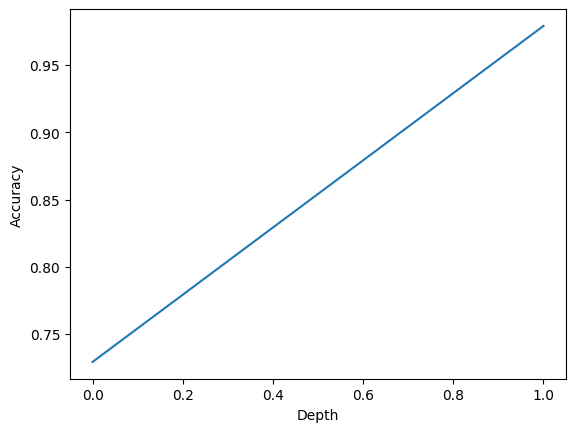

In [42]:
test_score = [clf.score(X_test, y_test) for clf in clfs]
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [43]:
X_train.shape

(110, 24)

In [44]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 1, 
    random_state=0
    ) 
cs_dt_best.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [45]:
pred1 = cs_dt_best.predict(X_test)
pred1[:5]
cm1 = pd.DataFrame(confusion_matrix(y_test, pred), index=['ckd', 'notckd'], columns=['No', 'Yes'])
cm1.index.name = 'True'
cm.columns.name = 'Predicted'
cm1

,No,Yes
True,,
ckd,12,1
notckd,0,35


In [46]:
fea_imp = cs_dt_best.feature_importances_
sorted_indices = fea_imp.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

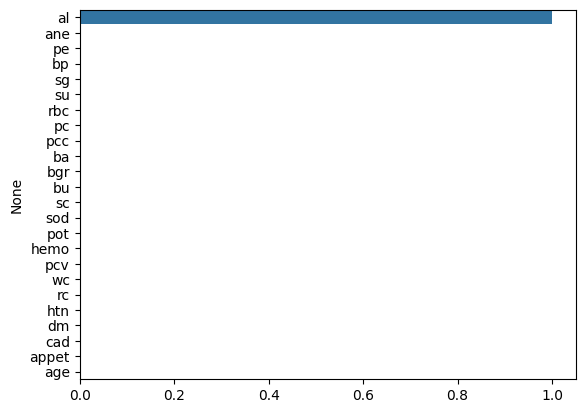

In [47]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

Comment: our findings show that our logistic regression is 100% accurate in predicting patients with chronic kideny disease on the test set while the decision tree was 97.9% accurate (12 + 35)/48. Also, our decision tree showed that albumin content is the sole variable that can accurately predict people with cdk. Moreover, people who have albumin content in the 0 category do not have cdk while people with an albumin content in a category other than 0 are predicted to have cdk.  

## Question 13 

In [48]:
#decision tree on the entire data set 
decision_tree = DecisionTreeClassifier(
    max_depth = 10, 
    random_state=0
)
decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

[Text(0.6, 0.8333333333333334, 'al <= 0.5\ngini = 0.396\nsamples = 158\nvalue = [43, 115]\nclass = notckd'),
 Text(0.4, 0.5, 'hemo <= -0.353\ngini = 0.017\nsamples = 116\nvalue = [1, 115]\nclass = notckd'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ckd'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 115\nvalue = [0, 115]\nclass = notckd'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]\nclass = ckd')]

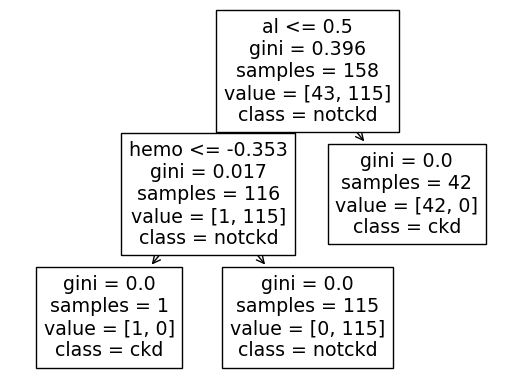

In [49]:
plot_tree(
    decision_tree, 
    max_depth= 10, 
    feature_names = X_train.columns.tolist(), 
    class_names=['ckd', 'notckd']
)

By retraining the model on all the available data, we see that our decision tree shows that both albumin and hemoglobin are significant in predicting a patient with coronory artery disease. This is in contrast to our original decision where only albumin content seemed to be used for prediction. Here, that this model is 100% accurate because it predicts that there was one other patient with albumin content in category 0 but but also had hemoglobin content less that -0.353 (standardized) which placed them as diagnosed with ckd. Thus, this decision tree is more accurate. 

## Question 14

Comment: From the decision tree above, it seems as though albumin and hemoglobin are significant in predicting if a patient has ckd or not. Lets use these two columns, remove the missing values, and then improve our logistic regression model to see if we can obtain a signficant model. 

## Question 16 

In [50]:
h = df[['al','hemo']]  # Replace 'target_column' with the name of your target variable
g = df['classification']
g = g.astype('category').cat.codes
cat = ['al']

for col in cat:
    X[col] = pd.Categorical(X[col]).codes


# Set the random seed for reproducibility
random_seed = 1

# Split the data into training and testing sets
h_train, h_test, g_train, g_test = train_test_split(h, g, test_size=0.3, random_state=random_seed)

In [51]:
model1 = sm.Logit(g_train, h_train).fit()

         Current function value: 0.000000
         Iterations: 35


c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\vishu\OneDrive\Desktop\STATS 3DA3\.venv\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may no

In [52]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        21:19:25   Log-Likelihood:            -6.3524e-09
converged:                      False   LL-Null:                       -64.455
Covariance Type:            nonrobust   LLR p-value:                 7.098e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
al           -25.7662    8.6e+04     -0.000      1.000   -1.69e+05    1.68e+05
hemo         120.3078   7.79e+04      0.002      0.999   -1.53e+05    1.53e+05
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

Comment: We have thus improved the logistic regression classifier since we are getting a model with a perfect prediction but we have also gotten rid of all but two variables. Hence, by the principle of parsimony, this model should be used and is more signficant. 

## Question 16 

https://github.com/vish-wad